In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import matplotlib as mpl

def import_matplotlib_style(label_size = 16):


    font = {'family' : 'monospace',
            'weight' : 'normal',
            'size'   : label_size}

    mpl.rc('font', **font)

    params = {'legend.fontsize': label_size,
              'figure.figsize': (7, 5),
              'axes.labelsize': label_size,
              'axes.titlesize':label_size,
              'xtick.labelsize':label_size,
              'ytick.labelsize':label_size}
    mpl.rcParams.update(params)

import_matplotlib_style()


In [47]:
df = pd.read_csv('optical_flares_FFD_slopes_literature.csv', dtype=str)
df = df[df.ignore=="0"]
df.columns.values

array(['author', 'slopemin', 'slopemax', 'notes', 'energymin',
       'energymax', 'notes.1', 'SpT min', 'SpT max', 'nstars', 'nflares',
       'Unnamed: 11', 'ignore'], dtype=object)

In [58]:
totflares=df.nflares.astype(float).sum()
totflares

123145.0

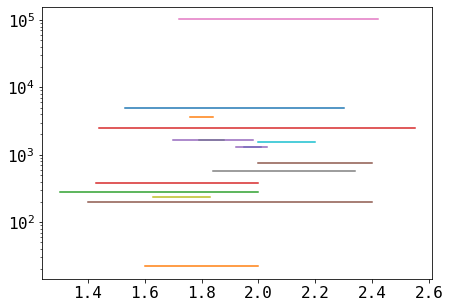

In [49]:
for label, row in df[["slopemin", "slopemax","nflares"]].dropna(how="any").iterrows():
    plt.plot([float(str(row.slopemin.replace(",","."))), float(str(row.slopemax.replace(",",".")))], [int(row.nflares)]*2)
plt.yscale("log")

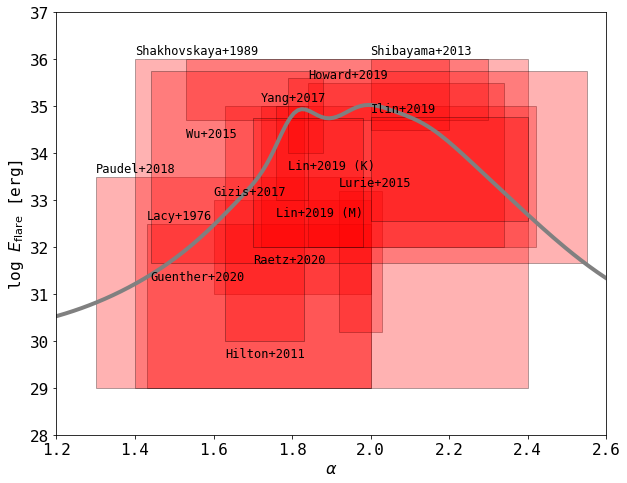

In [65]:
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection

def floatify(x):
    return float(str(x).replace(",","."))

def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

fix, ax = plt.subplots(1, figsize=(9,7))
#
alphas = np.linspace(0,4,400)
g = np.zeros_like(alphas)
boxes = []
for label, row in df[["slopemin", "slopemax","energymin", "energymax","author", "nflares"]].dropna(how="any").iterrows():
    mi , ma, nflares = floatify(row.slopemin), floatify(row.slopemax), floatify(row.nflares)
    g = g + gaussian(alphas, (mi + ma)/2, (ma - mi)/2, ) * np.sqrt(nflares / totflares)
    f = Rectangle((mi, floatify(row.energymin)),
             ma-mi,
             floatify(row.energymax) - floatify(row.energymin))
    if row.author in ["Hilton2011","Lin+2019 (M)","Lin+2019 (K)",
                      "Wu+2015", "Hilton+2011", "Guenther+2020",
                      "Raetz+2020"] :
        ax.text(mi, floatify(row.energymin)-0.35, row.author, fontsize=12)
    else:
        ax.text(mi, floatify(row.energymax)+0.1, row.author, fontsize=12)
    boxes.append(f)
ax.plot(alphas, 30+g*3, c="grey", linewidth=4)
# Create patch collection with specified colour/alpha
pc = PatchCollection(boxes, facecolor="r", alpha=.3,
                     edgecolor="k")
ax.add_collection(pc)

plt.xlim(1.2,2.6)
plt.ylim(28,37)
plt.xlabel(r"$\alpha$")
plt.ylabel(r"log $E_\mathrm{flare}$ [erg]")
plt.tight_layout()
#plt.savefig("overview_alpha_literature.png", dpi=300)
plt.savefig("Flares_in_Clusters_with_K2_2/pics/appendix/overview_alpha_literature.png", dpi=300)

In [9]:
alphas = np.linspace(0,4,400)
g = np.zeros_like(alphas)

for label, row in df[["slopemin", "slopemax","energymin", "energymax","author"]].dropna(how="any").iterrows():
    mi , ma = floatify(row.slopemin), floatify(row.slopemax) 
    g = g + gaussian(alphas, (mi + ma)/2, (ma - mi)/2, )

In [36]:
df.nflares.astype(float)

0          NaN
2         22.0
3        283.0
4        386.0
6          NaN
7        200.0
8     102187.0
9        575.0
10       239.0
11      1547.0
12      4944.0
13      3589.0
14      1647.0
15      2520.0
16      1662.0
17       751.0
Name: nflares, dtype: float64

In [15]:
alphas[np.argmax(g)]

1.9849624060150375

In [17]:
np.log10(3.6e32)

32.55630250076729